### importar librerias

In [86]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Definicion de variables que contienen los enlaces para acceder a los datos

In [87]:
datos_2024 = 'https://raw.githubusercontent.com/Edithson1/archivos/main/california%202024.csv'
datos_2023 = 'https://raw.githubusercontent.com/Edithson1/archivos/main/california%202023.csv'
datos_2022 = 'https://raw.githubusercontent.com/Edithson1/archivos/main/california%202022.csv'
datos_2021 = 'https://raw.githubusercontent.com/Edithson1/archivos/main/california%202021.csv'
datos_2020 = 'https://raw.githubusercontent.com/Edithson1/archivos/main/california%202020.csv'
datos_2019 = 'https://raw.githubusercontent.com/Edithson1/archivos/main/california%202019.csv'
lista_datos = [datos_2019,datos_2020,datos_2021,datos_2022,datos_2023]

### Extraccion de los datos usando pandas para su lectura en python

In [88]:
for i in range(len(lista_datos)):
  lista_datos[i] = pd.read_csv(lista_datos[i])
test = pd.read_csv(datos_2024)

## Limpieza de los datos

### seleccion de las columnas importantes para la prediccion

In [89]:
queda = ['Date', 'Daily Max 8-hour CO Concentration', 'Daily AQI Value', 'Site ID']
for i in range(len(lista_datos)):
  lista_datos[i] = lista_datos[i][queda]
test = test[queda]

### Combinación de las listas en una sola

In [90]:
datos_combinados = pd.concat(lista_datos)

### Convercion de las fechas para una mejor lectura

In [91]:
datos_combinados['Date'] = pd.to_datetime(datos_combinados['Date'])
test['Date'] = pd.to_datetime(test['Date'])

### Seleccion de una sola locación para la prediccion

In [92]:
#datos_combinados = datos_combinados[datos_combinados['Site ID'] == list(datos_combinados['Site ID'].unique())[0]]

In [93]:
#datos_combinados

### Converción de las fechas a numero para poder usarlo en la predicción

In [94]:
datos_combinados = datos_combinados.sort_values(by='Date')
test = test.sort_values(by='Date')
# 1. Convertir la fecha a formato numérico
datos_combinados['Date'] = pd.to_datetime(datos_combinados['Date'])
datos_combinados['Date'] = datos_combinados['Date'].dt.day + datos_combinados['Date'].dt.month*31
test['Date'] = pd.to_datetime(test['Date'])
test['Date'] = test['Date'].dt.day + test['Date'].dt.month*31

In [95]:
datos_combinados

,Date,Daily Max 8-hour CO Concentration,Daily AQI Value,Site ID
0,32,0.4,5,60010009
4694,32,0.1,1,60270002
16858,32,0.1,1,60712002
4329,32,0.2,2,60250005
17219,32,0.1,1,60719004
...,...,...,...,...
347,403,0.5,6,60010009
7891,403,0.6,7,60372005
13048,403,0.5,6,60719004
13413,403,0.6,7,60731017


## Regresion lineal usando solo Dailu AQI Value

In [96]:
X = datos_combinados[['Daily Max 8-hour CO Concentration']]
y = datos_combinados[['Daily AQI Value']]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [97]:
y

,Daily AQI Value
0,5
4694,1
16858,1
4329,2
17219,1
...,...
347,6
7891,7
13048,6
13413,7


In [98]:
prediccion = model.predict(X)

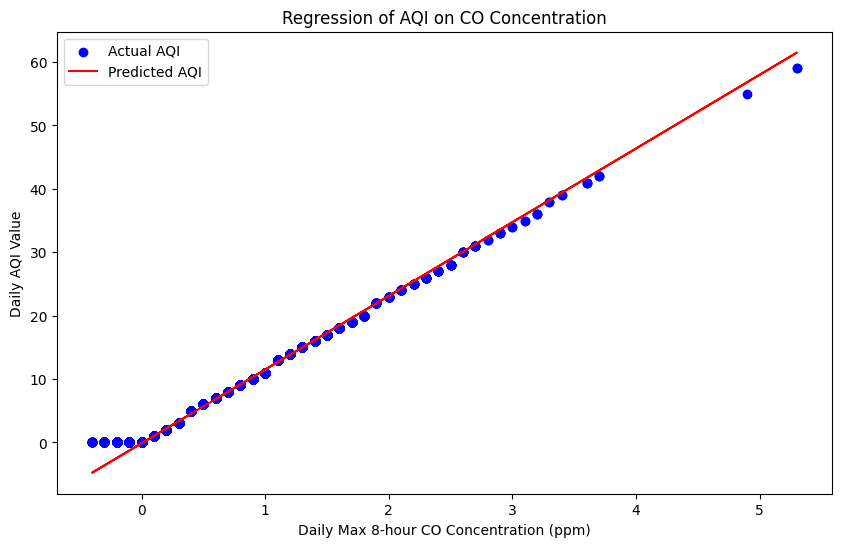

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual AQI')
plt.plot(X, prediccion, color='red', label='Predicted AQI')
plt.xlabel('Daily Max 8-hour CO Concentration (ppm)')
plt.ylabel('Daily AQI Value')
plt.title('Regression of AQI on CO Concentration')
plt.legend()
plt.show()

In [100]:
test

,Date,Daily Max 8-hour CO Concentration,Daily AQI Value,Site ID
0,32,0.6,7,60010009
3993,32,0.5,6,60750005
4030,32,0.3,3,60771003
4053,32,0.8,9,60811001
507,32,0.5,6,60190011
...,...,...,...,...
1068,216,0.4,5,60371103
2527,216,0.6,7,60590008
2345,218,0.3,3,60590007
1069,218,0.4,5,60371103


## Regresion lineal usando las fechas, el Daily AQI Value en una unica locación

Mean Absolute Error (MAE): 0.023624496570604638
R² Score: 0.9880705976268337


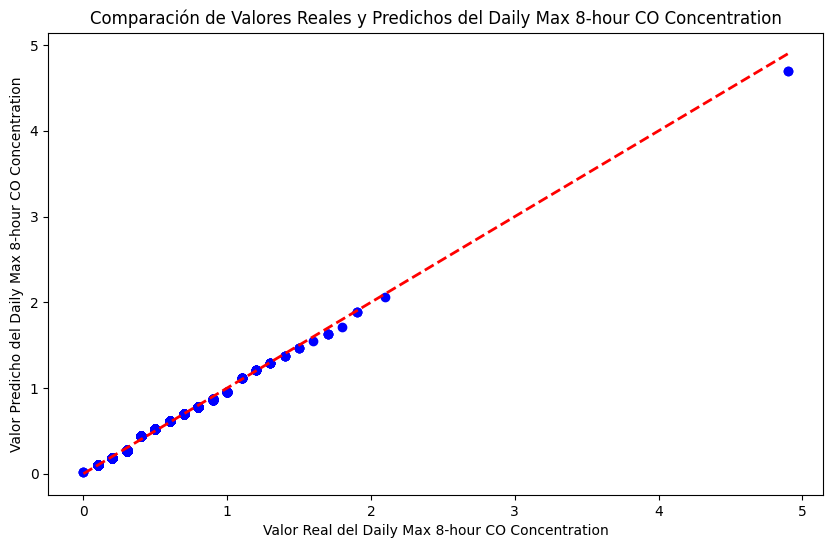

In [102]:
# X: Concentración de CO, y: AQI
y_train = datos_combinados[['Daily Max 8-hour CO Concentration']]
X_train = datos_combinados.drop(columns=['Daily Max 8-hour CO Concentration'])
y_test = test[['Daily Max 8-hour CO Concentration']]
X_test = test.drop(columns=['Daily Max 8-hour CO Concentration'])

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real del Daily Max 8-hour CO Concentration')
plt.ylabel('Valor Predicho del Daily Max 8-hour CO Concentration')
plt.title('Comparación de Valores Reales y Predichos del Daily Max 8-hour CO Concentration')
plt.show()
